# Date-a Science
_Aindra Thin, Iain Bromley, Shiyue (Sybil) Wang, Yash Vig_

The purpose of our research project is to explore the specific attributes and characteristics which shape people’s decisions in their selecting their romantic partners. This study fits into the broader scope of psychological research which tests predefined notions of interpersonal relationships and their realistic outcomes.

**We aim to answer the following questions:**
- How much does race play a factor in the selection of potential partners? 
- How important are shared interests important in terms of relationship compatibility? 
- What are factors that affect the likelihood of going on a second date?
- Difference in male and female partner selection

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [8]:
all_data = pd.read_csv('data/data.csv')

## Data Prep
> The dataset that we acquired contained 195 columns. Much of this data does not help us answer our research questions, so we have filtered them out. We decided not to add any extra columns, because there was so much data available for us to explore our research questions.

In [37]:
# select columns we want to keep
data = all_data[['iid', 'pid', 'gender', 'order', 'age', 'age_o', 'imprace', 'race', 'race_o', 'samerace', \
                 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', \
                 'shar_o',  'int_corr', 'dec', 'dec_o', 'match', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', \
                 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'field_cd']]

In [38]:
data.head()

,iid,pid,gender,order,age,age_o,imprace,race,race_o,samerace,...,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,field_cd
0,1,11.0,0,4,21.0,27.0,2.0,4.0,2.0,0,...,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,1.0
1,1,12.0,0,3,21.0,22.0,2.0,4.0,2.0,0,...,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,1.0
2,1,13.0,0,10,21.0,22.0,2.0,4.0,4.0,1,...,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,1.0
3,1,14.0,0,5,21.0,23.0,2.0,4.0,2.0,0,...,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,1.0
4,1,15.0,0,7,21.0,24.0,2.0,4.0,3.0,0,...,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,1.0


## Exploratory Data Analysis
> The first section of your report will provide a detailed overview of the dataset. Using both written and visual approaches, this section will introduce the data to the reader in the context of the research questions. Be sure to provide in depth analyses of the distributions of key variables of interest. More than anything, this section should convey a nuanced understanding of the dataset being used.

### Overview
> Our data is formatted as _paired data_. Each row represent's one participants's experience in one round of a speed dating, where we have the following information: 
- **iid**: the participants's unique ID number
- **pid**: the unique ID number of their partner during that round.
- **gender**:
- **order**:
- **age**
- **age_o**
- **imprace**: how important is it to date a partner of the same race? (scale of 1-10)
- **race**:
- **race_o**:
- **samerace**: participant and partner were the same race (0=no, 1=yes)
- **dec**: the participant's decision to see partner again (0=no, 1=yes)
- **dec_o**: partner's decision to see participant again (0=no, 1=yes)
- **match**: both partners decided to see each other again (0=no, 1=yes)

> There are many columns that are repeated throughout the dataset, which represent different attributes of participants:
- Attractiveness "attr"
- Sincerity "sinc"
- Intelligence "intel"
- Funny "fun"
- Ambition "amb"
- Shared Interests "shar"

> Suffixes are added to each attribute which mean the following:  
> (Formatted so that _attribute_ is the shortened name of the attribute)
- **_attribute_** : the participant's rating of their partner (scale of 1-10)
- **_attribute_\_o**: the partner's rating of this person (scale of 1-10)
- **_attribute_\_1_1**: what participant looks for in a partner (given 100 points to distribute among all 6 attributes)
- **_attribute_\_2_1**: what the participant thinks the opposite sex looks for in a partner (given 100 points to distribute among all 6 attributes)

In [39]:
# group data by each individual participant
by_person = data[["iid", "dec", "match"]].groupby("iid").aggregate("sum")

# create array, add success rate for each person
success_rate = []
for i, row in by_person.iterrows():
    if row['dec'] == 0.0:
        success_rate.append(0)
    else:
        success_rate.append(row['match'] / row['dec'])
by_person.insert(1, 'success_rate', success_rate)

### Success Rate
> This histogram shows the success rate of speed dating. This is measured by two variables: **dec** and **match**  
> Out of the number of partners that a participant chooses to see again, what ratio of them share a mutual interest?

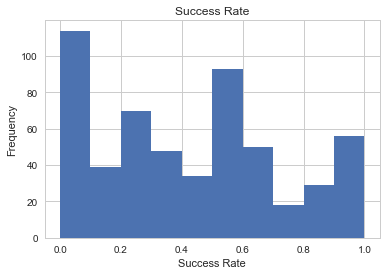

In [40]:
# create histogram
plt.hist(success_rate)
plt.title("Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")
plt.show()

## Statistical Modeling

### Importance of Different Attributes
>These paired box plots show how important each attribute is in finding a romantic partner.
Green represents ratings where participants indicated that they would go on a second date with their partner,
where yellow represents ratings where they would not. Each of these rating were collected after a speed dating round, rating their partner on a scale of 0-10, 0 being the lowest rating and 10 being the highest rating.
For every attribute except for **ambition**, the 'yes' to second date responses had higher ratings. Therefore most of the attributes has a positive relationship with the decision made by the partner, as we would expect.

>Out of all of these attributes, this would indicate that **ambition** is the least important in finding a partner.

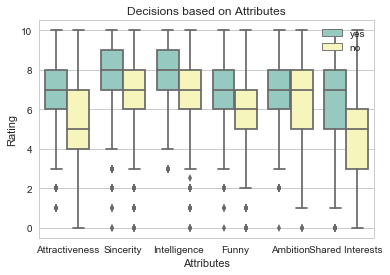

In [41]:
# select participant's ratings of partner for each attribute
# rename columns (friendly names for graph)
data_select = data[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'dec']]
data_select.columns = ["Attractiveness", "Sincerity", "Intelligence", "Funny", "Ambition", "Shared Interests", "Decision"]

# reshape data to have decision be the key
# rename decision column (friendly names for graph legend)
shaped = pd.melt(data_select, id_vars=['Decision'], value_name='score')
shaped['Decision'] = shaped['Decision'].map({1: 'yes', 0: 'no'})

# create boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x="variable", y="score", hue="Decision",
                data=shaped, palette="Set3")
ax.set_title('Decisions based on Attributes')
ax.set_ylabel('Rating')
ax.set_xlabel('Attributes')
plt.legend(loc='upper right')
plt.show()

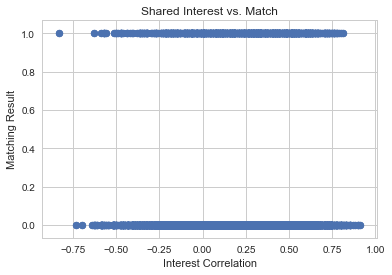

In [42]:
#Shared interest vs. match
share_int = data[['int_corr','match']] 

plt.title("Shared Interest vs. Match")
plt.xlabel("Interest Correlation")
plt.ylabel("Matching Result")
plt.scatter(share_int.int_corr, share_int.match)
plt.show()

### Influence of Attributes on Match Making

> Now that we understand there is a **positive relationship** between all the attributes we would like to understand how strongly these characteristics are correlated to the positive decision of the opposite sex. To generate this graph we created a "positive response" metric which is the the ratio of the number of partners who indicated they would like to meet again to the number of total matches. We plotted this against the score of each attribute as used in the previous visualization. Finally, we added a correlation coefficient (R score) to the graph to distinctly identify each the strength of each relationship between the two variables.

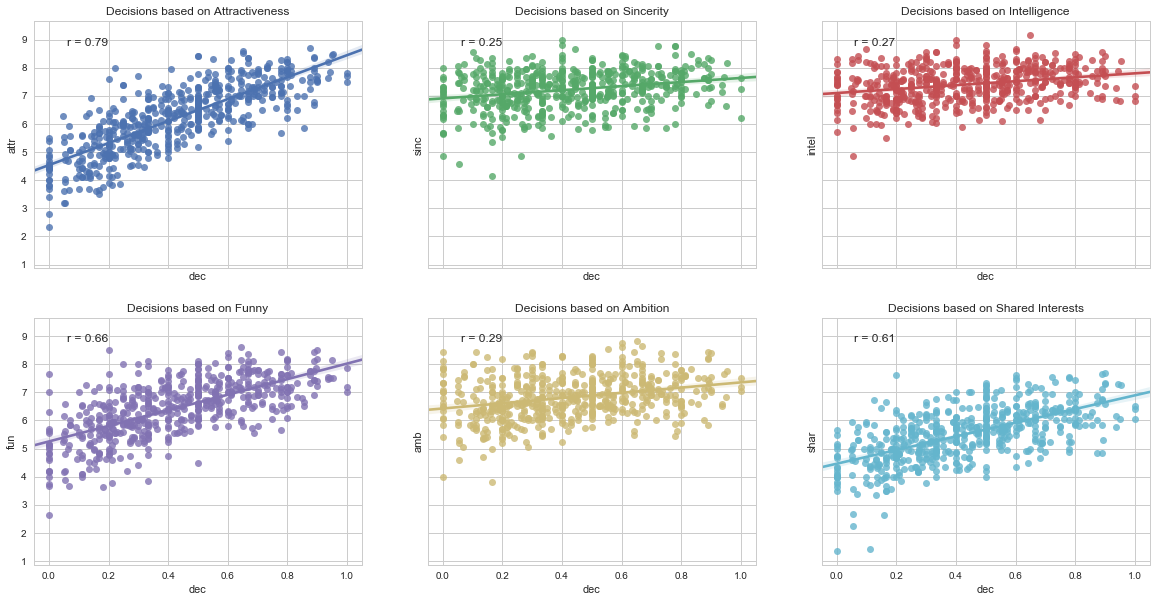

In [43]:
# import linear model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# takes in the column name for an attribute
# returns the mean values of that attribute for each partner 
# returns the mean value of whether or not participants would go on a second date with that partner
def linreg(col):
    mean_attr = data.groupby('pid')[col].mean()
    dec_attr = data.groupby('pid')['dec'].mean()
    lm = linear_model.LinearRegression()
    lm = lm.fit(mean_attr.reshape(-1,1), dec_attr.reshape(-1, 1))
    pred = lm.predict(mean_attr.reshape(-1, 1))
    return mean_attr, dec_attr, pred, math.sqrt(lm.score(mean_attr.reshape(-1, 1), dec_attr.reshape(-1, 1)))

# Feature lists
feature_names = ["Attractiveness", "Sincerity", "Intelligence", "Funny", "Ambition", "Shared Interests", "Decision"]
feature_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
# Mutltiple subplots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharex=True, sharey=True)
axes.flat
# Enumerate through all the attributes running the linreg() function
for index, col in enumerate(feature_list):
    # assign variables from function locally
    mean_attr, dec_attr, pred, text = linreg(col)
    # Generate subplot based on variables
    sns.regplot(x=dec_attr, y=mean_attr, ax=axes.flat[index])
    # Annotate plot title and r value
    axes.flat[index].annotate("r = {:.2f}".format(text), xy=(.1, 0.9), xycoords=axes.flat[index].transAxes)
    axes.flat[index].set_title('Decisions based on ' + feature_names[index])
plt.show()

### Race as a Dating Factor
> In the section we wanted to answer how much does race play a role in the selection of potential partners. To perform this analysis we created ratios within each race group of matches of partners of the same race to the number matches in total. This fractional metric is symmetric across the diagonal because all matches (either male or female) are grouped into the same metric. From this plot we see there is a rather **high level of affinity for African American matches** relative to all other racial counterparts within the dataset

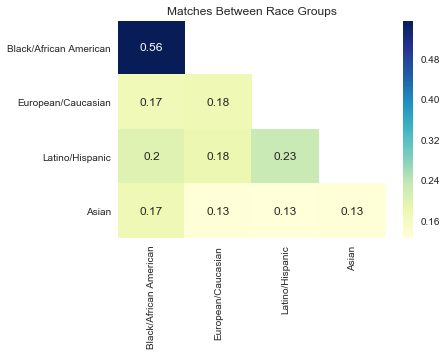

In [44]:
race_features = ['race', 'race_o', 'match']
race_data = all_data[race_features]
race_exp = race_data[race_data['race'] != 6].dropna()
race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
for row in race_exp.iterrows():
    race = row[1]['race'] 
    race_o = row[1]['race_o']
    match = row[1]['match']
    if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
        race_match[race][race_o] += match
        race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
mask = np.zeros_like(race_match_df)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

ax.set_title('Matches Between Race Groups')
plt.show()

### Men's Choice by Race

> Specifically, we also intended to segment the results by gender so we selected out the women from the original dataset, and plotted their preferences on a racial heatmap. In this instance, the results differ across the diagonal, because the decisions of the participant and their partner are distinct separated in this representation. Again we see, the affinity for women who are African American are still have a higher positive response rate. Additionally, we see that men of African American ethnicity are likely to give positive responses across all racial groups except for Asians relative to men of differing ethnic groups

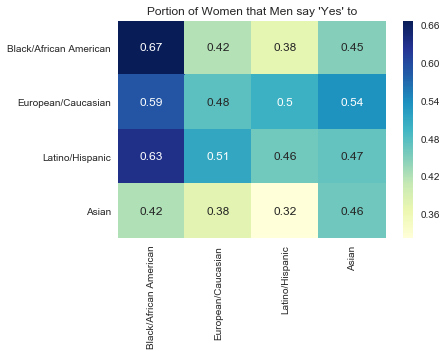

In [45]:
race_features = ['race', 'race_o', 'dec']
race_data = all_data[data['gender'] == 1][race_features]
race_exp = race_data[race_data['race'] != 6].dropna()
race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
for row in race_exp.iterrows():
    race = row[1]['race'] 
    race_o = row[1]['race_o']
    match = row[1]['dec']
    if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
        race_match[race][race_o] += match
        race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
mask = np.zeros_like(race_match_df)
ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

ax.set_title('Portion of Women that Men say \'Yes\' to')

plt.show()

### Woman's Choice by Race
> Alternatively, we make similar comparisons for women by selecting the men from the original dataset, and plot their preferences in the exact same format as the chart above. From this heatmap, we can see that **on average, the positive responses for women are lower** than their male counter parts across all racial groups. Yet similarly we notice the same anomaly, for which African Americans women have a high affinity for partners of the same race over other ethnic groups.

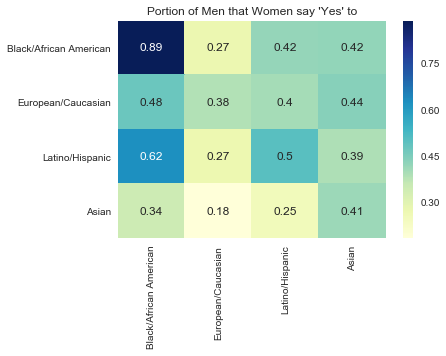

In [46]:
race_features = ['race', 'race_o', 'dec']
race_data = all_data[data['gender'] == 0][race_features]
race_exp = race_data[race_data['race'] != 6].dropna()
race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
for row in race_exp.iterrows():
    race = row[1]['race'] 
    race_o = row[1]['race_o']
    match = row[1]['dec']
    if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
        race_match[race][race_o] += match
        race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
mask = np.zeros_like(race_match_df)
ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

ax.set_title('Portion of Men that Women say \'Yes\' to')
plt.show()

In [47]:
def prep(attribute, total):
    total[attribute+'_you'] = [0]*len(total.iloc[:, 1])
    d = {}
    for i in range(10):
        d[i + 1] = {}
        for j in range(10):
            d[i + 1][j + 1] = 0
    for index in total.index:
        think1 = total.loc[index, attribute+'5_1']
        think2 = total.loc[index, attribute+'3_1']
        if math.isnan(think1) & math.isnan(think2):
            total.loc[index, attribute+'_you'] = float('nan')
        elif math.isnan(think1):
            total.loc[index, attribute+'_you'] = think2
        elif math.isnan(think2): 
            total.loc[index, attribute+'_you'] = think1
        else:
            total.loc[index, attribute+'_you'] = round((think1+think2)/2)
        total.loc[index, attribute+'_o'] = round(total.loc[index, attribute+'_o'])
    total = total.drop([attribute+'5_1', attribute+'3_1'], axis = 1)
    total = total.sort_values(by=attribute+'_you')
    total = total.reset_index()
    total = total.dropna()
    for index, row in total.iterrows():
        you = total.loc[index, attribute+'_you']
        other = total.loc[index, attribute+'_o']
        d[you][other] += 1
    total['count'] = [0]*len(total.iloc[:, 1])
    for index, row in total.iterrows():
        you = total.loc[index, attribute+'_you']
        other = total.loc[index, attribute+'_o']
        total.loc[index, 'count'] = (float)(math.pow((2*d[you][other]), 1.5))
    return total

In [48]:
def plot(attribute, total):
    plt.figure(figsize = (6,6))
    plt.scatter(total[attribute+'_you'], total[attribute+'_o'],s = total['count'])
    plt.plot(range(1,11), range(1,11), c = 'red', alpha = 0.5)
    plt.ylabel('Average scores of partner rating')
    plt.xlabel('Average score of self assessment')
    return plt

In [49]:
def dist(attribute, gender):
    males = all_data[data['gender'] == gender]
    others_see_you = pd.DataFrame(males.groupby('iid')[attribute + '5_1'].mean())
    you_see_yourself = pd.DataFrame(males.groupby('iid')[attribute + '3_1'].mean())
    others_rated_you = pd.DataFrame(males.groupby('iid')[attribute + '_o'].mean())
    total = others_see_you.join(you_see_yourself)
    total = total.join(others_rated_you)
    total = prep(attribute, total)
    plot(attribute, total)

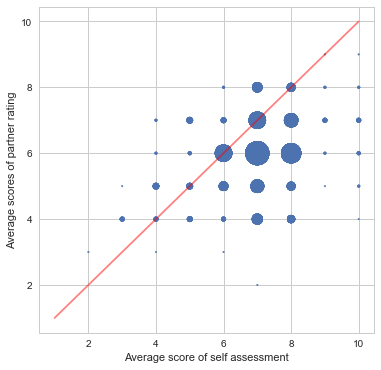

In [50]:
dist('attr', 1)
plt.show()

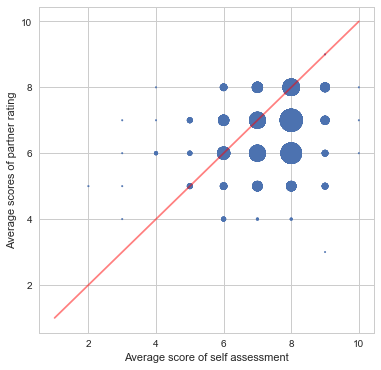

In [51]:
dist('attr', 0)
plt.show()

In [ ]:
all_data = data[np.isfinite(all_data['field_cd'])]
field = pd.DataFrame(all_data.groupby('iid')['field_cd'].mean())
all_data = all_data[np.isfinite(all_data['field_cd'])]
all_data['field_o'] = [0]*len(all_data.iloc[:, 1])
for index, row in data.iterrows():
    pid = data['pid'][index]
    if pid in field.index:
        data['field_o'][index] = field.loc[pid, 'field_cd']
    else:
        data['field_o'][index] = float('nan')

In [ ]:
data = data[np.isfinite(data['field_o'])]
race_features = ['field_cd', 'field_o', 'match']
race_data = data[race_features]
race_match = {}
race_count = {}
for i in range(1,19):
    race_match[(float)(i)] = {}
    race_count[(float)(i)] = {}
    for j in range(1,19):
        race_match[(float)(i)][(float)(j)] = 0
        race_count[(float)(i)][(float)(j)] = 0
for row in race_data.iterrows():
    race = row[1]['field_cd'] 
    race_o = row[1]['field_o']
    match = row[1]['match']
    race_match[race][race_o] += match
    race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
plt.figure(figsize = (15,15))
mask = np.zeros_like(race_match_df)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(race_match_df, annot=True, mask = mask, cmap="YlGnBu", yticklabels = race_match_df.columns)
ax = plt.axes()
ax.set_title('fraction of matches within race groups')
plt.show()